*Importando Bibliotecas*

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

*Tratamento dos dados*: 

Importa os dados, determinando qual o delimitador e o marcador do decimal. Dá atenção ao dado de pressão, que contém "." e ",". 

In [12]:
# Ler o arquivo CSV para maregrafo_1
maregrafo_1 = pd.read_csv("ilhabela.txt", delimiter=';', decimal=",", engine="python",parse_dates=['Date'], dayfirst=True)

# Ler o arquivo CSV para maregrafo_2 (supondo que seja um arquivo diferente ou o mesmo)
maregrafo_2 = pd.read_csv("belem.txt", delimiter=';', decimal=",", engine="python", parse_dates=['Date'], dayfirst=True)

# Substituir o ponto por nada (remover os milhares) e a vírgula por ponto decimal
maregrafo_1['Atm.Pressu (Ins)'] = maregrafo_1['Atm.Pressu (Ins)'].replace({r'\.': ''}, regex=True)
maregrafo_2['Atm.Pressu (Ins)'] = maregrafo_1['Atm.Pressu (Ins)'].replace({r'\.': ''}, regex=True)

maregrafo_1['Atm.Pressu (Ins)'] = maregrafo_1['Atm.Pressu (Ins)'].replace({r',': '.'}, regex=True)
maregrafo_2['Atm.Pressu (Ins)'] = maregrafo_1['Atm.Pressu (Ins)'].replace({r',': '.'}, regex=True)

# Manter os nomes das colunas intactos
colunas_1 = maregrafo_1.columns
colunas_2 = maregrafo_2.columns

# Converter as colunas para valores numéricos
maregrafo_1 = maregrafo_1.apply(pd.to_numeric, errors='coerce')
maregrafo_2 = maregrafo_2.apply(pd.to_numeric, errors='coerce')


*Verifica se a data foi importada corretamente e trata erros.*

In [ ]:
# Tente forçar a conversão para datetime
maregrafo_1['Date'] = pd.to_datetime(maregrafo_1['Date'], unit='ns', errors='coerce', dayfirst=True)
maregrafo_2['Date'] = pd.to_datetime(maregrafo_2['Date'], unit='ns', errors='coerce', dayfirst=True)

# Exclua ou substitua as linhas com valores NaT, se necessário
maregrafo_1 = maregrafo_1.dropna(subset=['Date'])
maregrafo_2 = maregrafo_2.dropna(subset=['Date'])

*Selecione as variáveis a serem plotadas*

In [18]:
# Lista das variáveis que você deseja plotar (ajuste conforme necessário)
variaveis = [
    'Wind Spd. (Ins)','Wind Dir. (Ins)','Air.Temp. (Ins)','Rel. Hum. (Ins)','Atm.Pressu (Ins)','GPSLat. (Avg.)','GPSLongit. (Avg.)'
]

# Caso tenha dúvida quanto as variáveis disponíveis, execute a linha abaixo
# print(maregrafo_1.columns)
# print(maregrafo_2.columns)

*Plotar gráficos e gerar imagens:*

<Figure size 1800x1800 with 0 Axes>

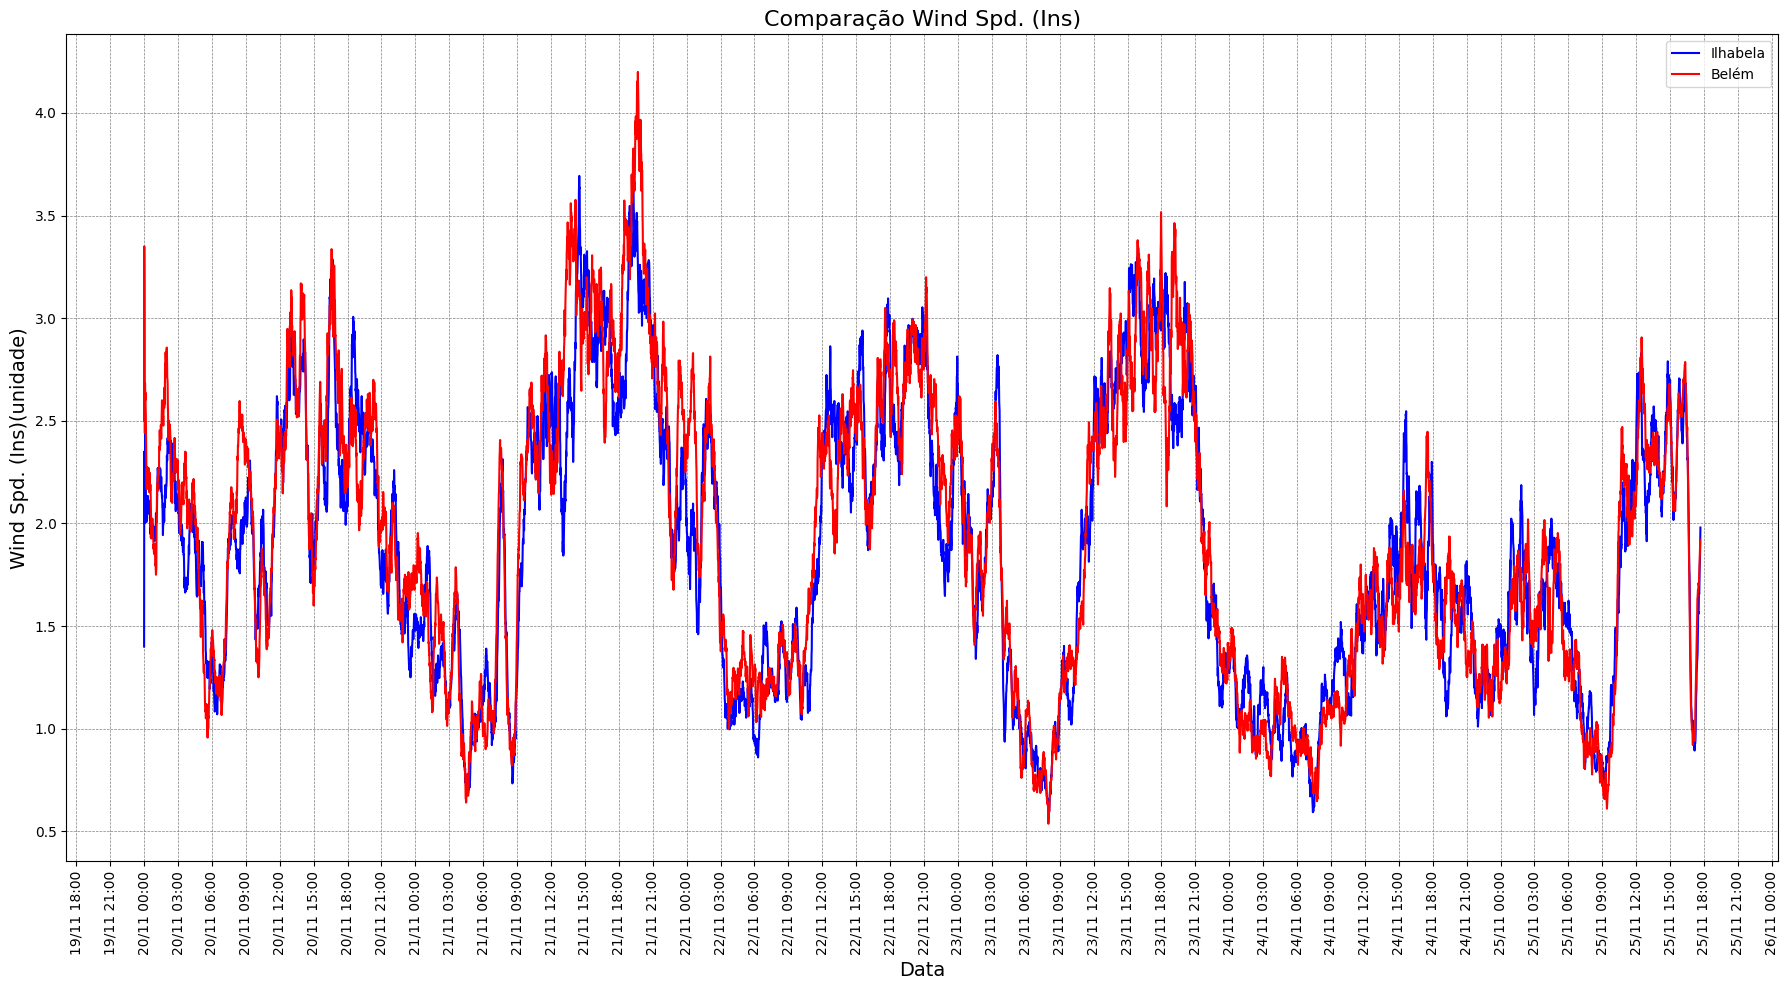

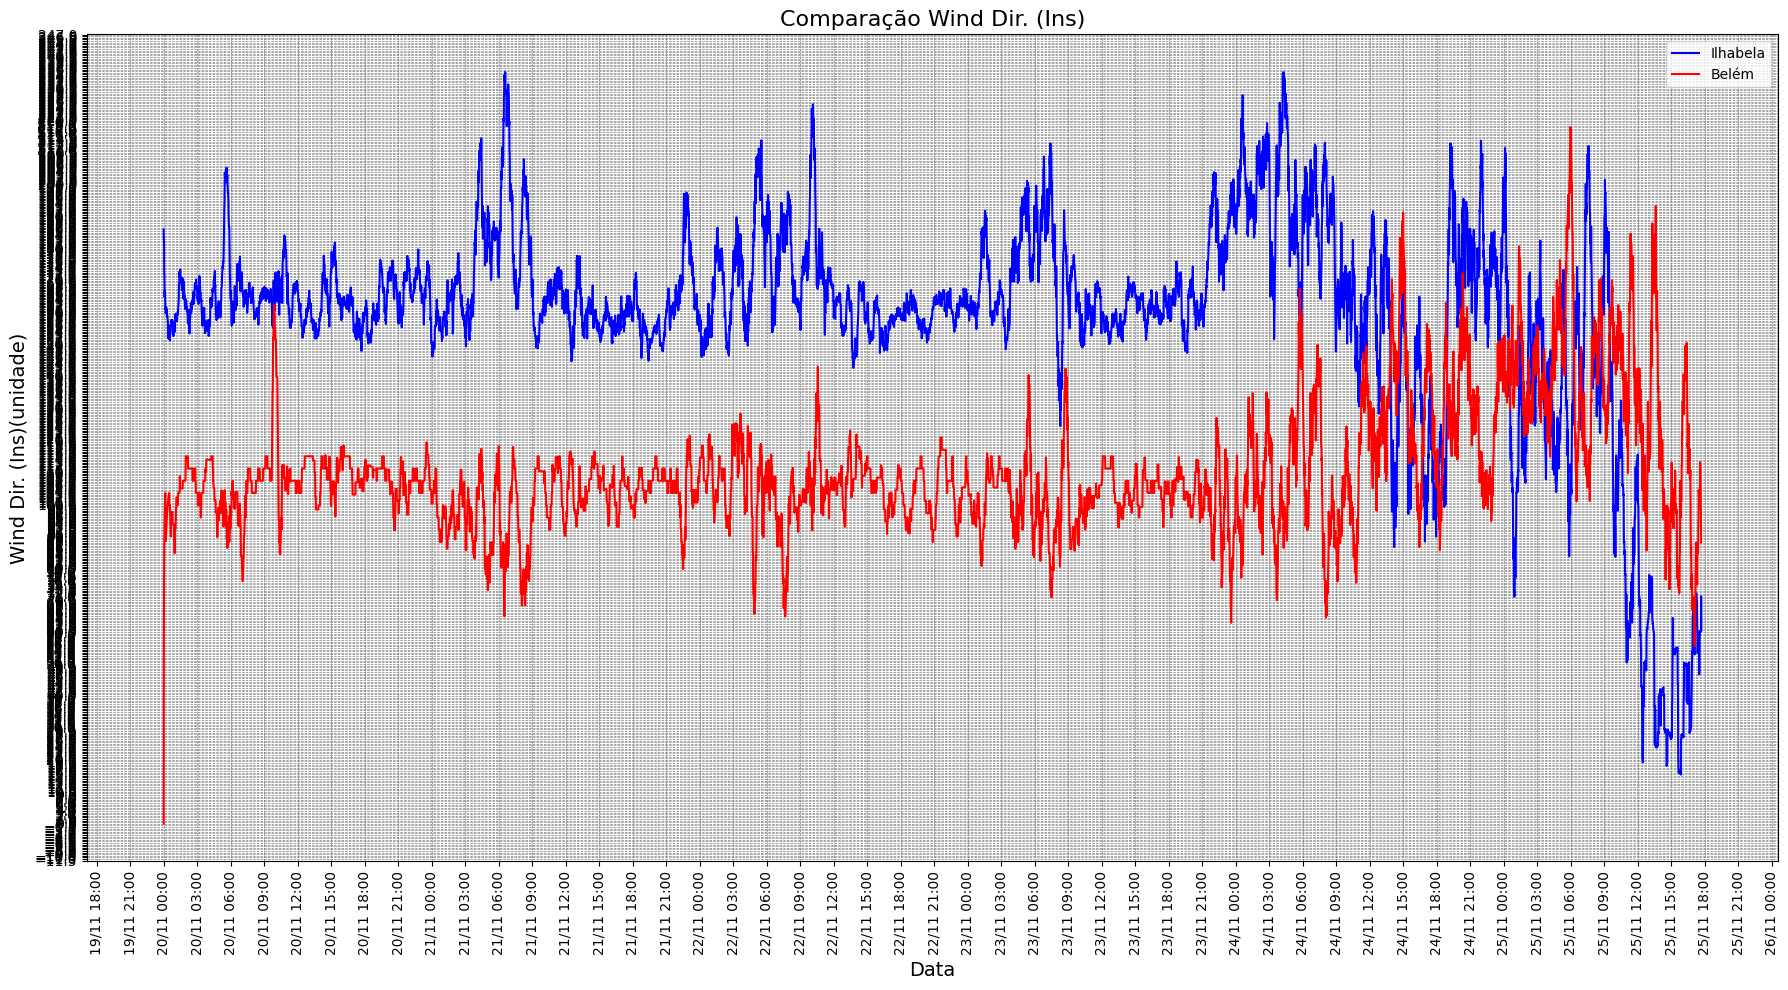

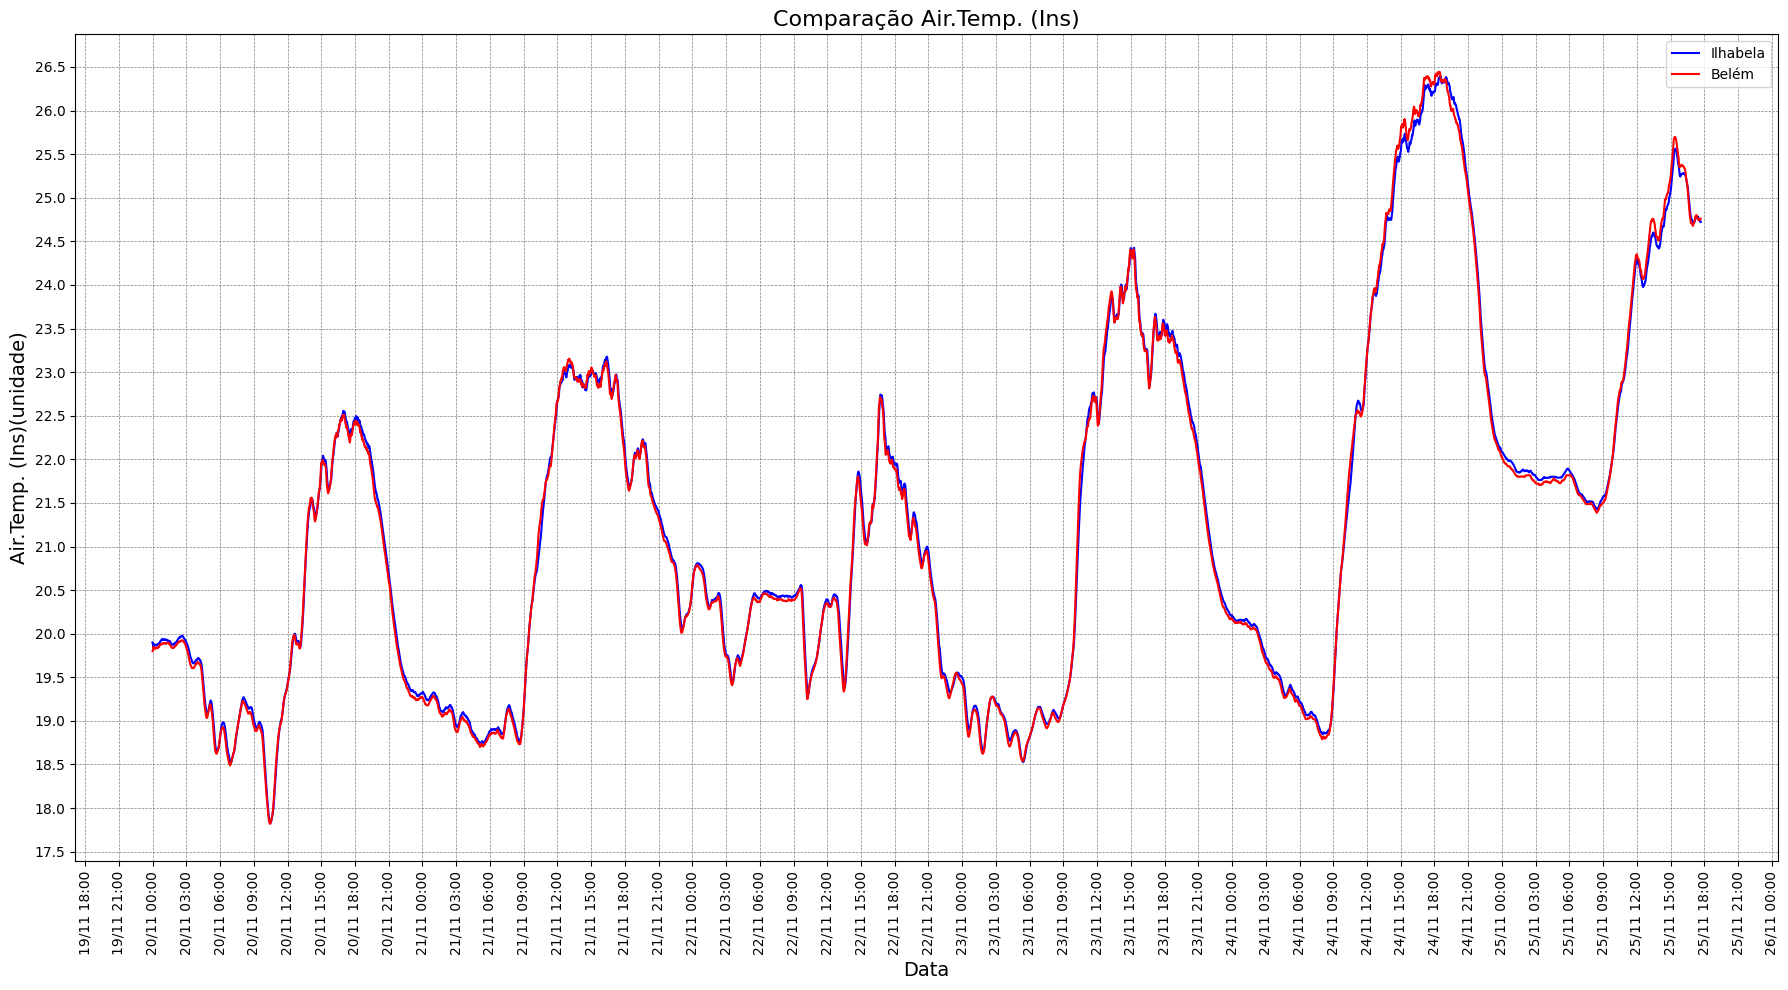

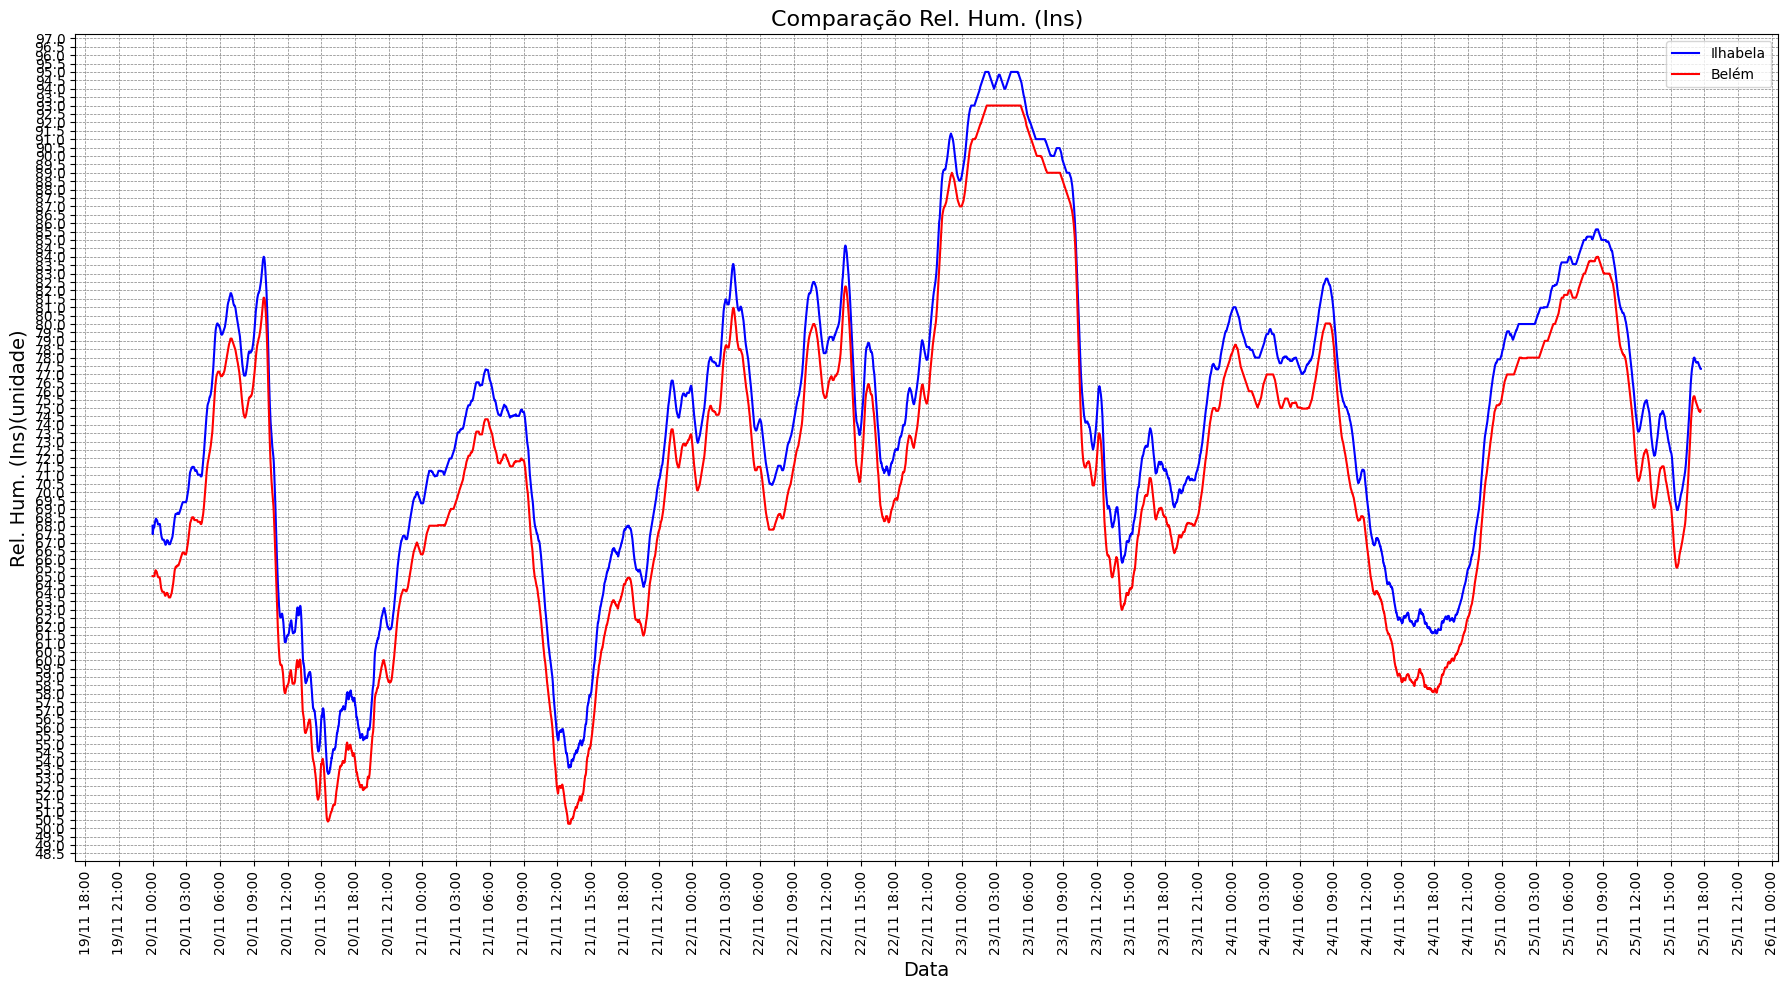

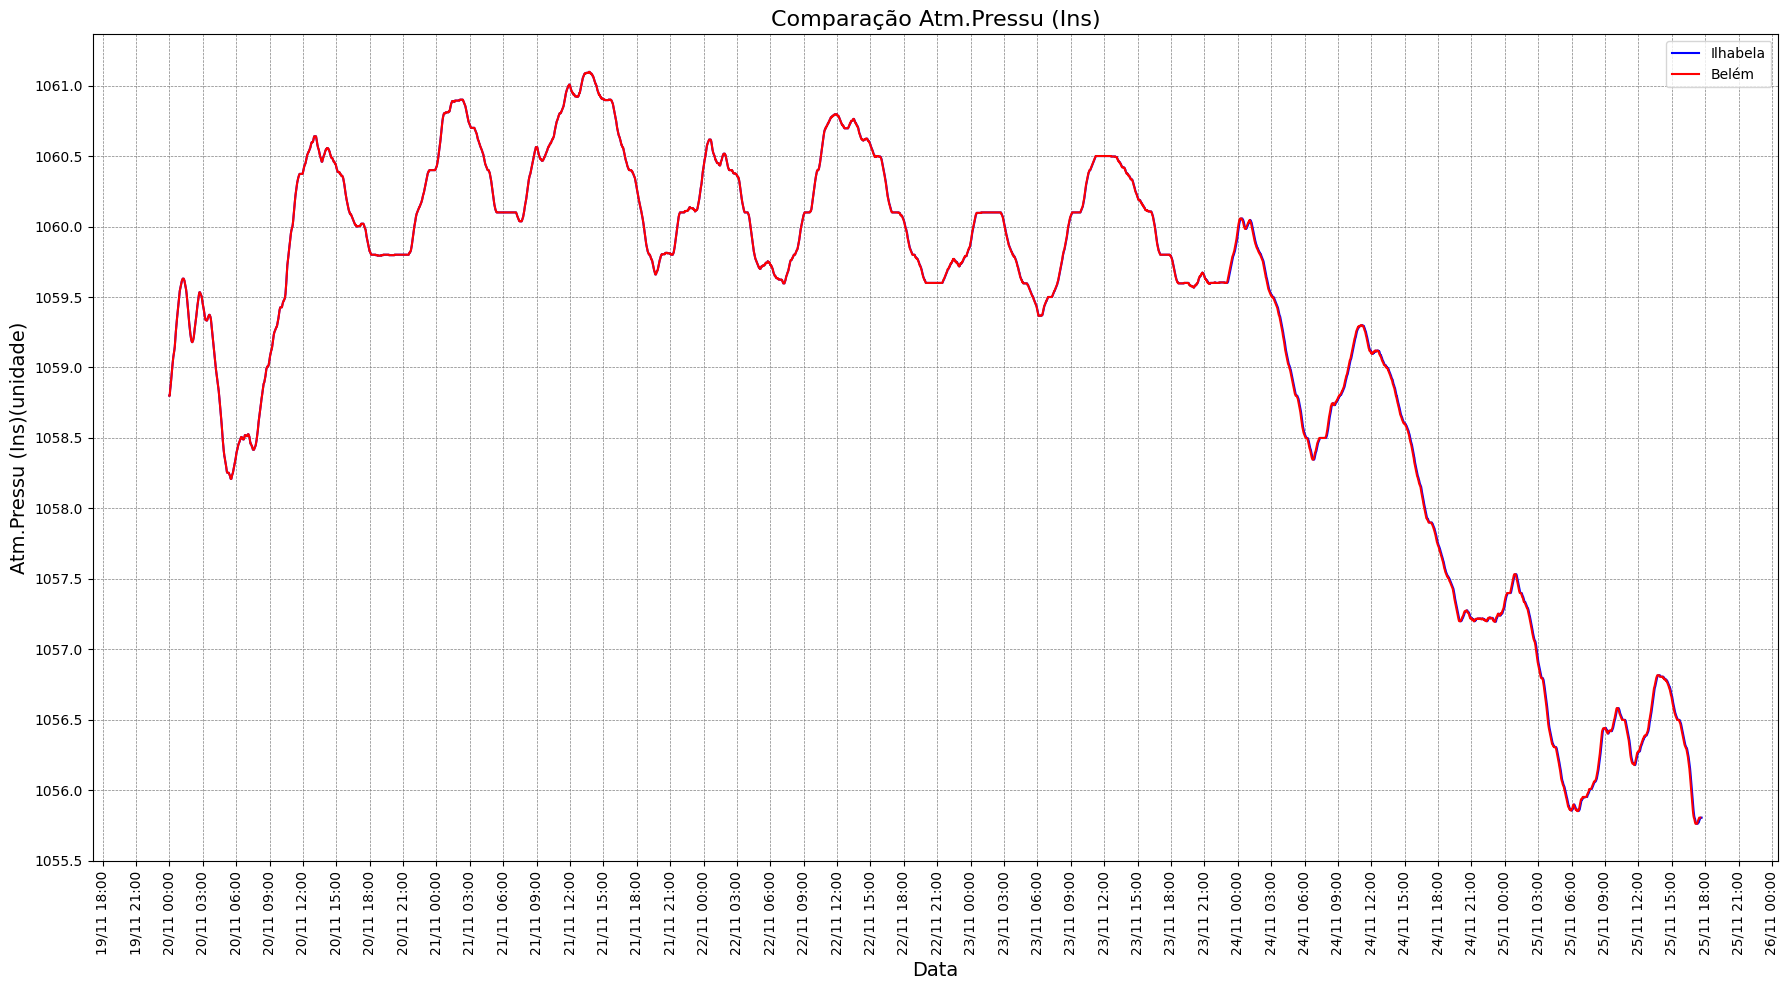

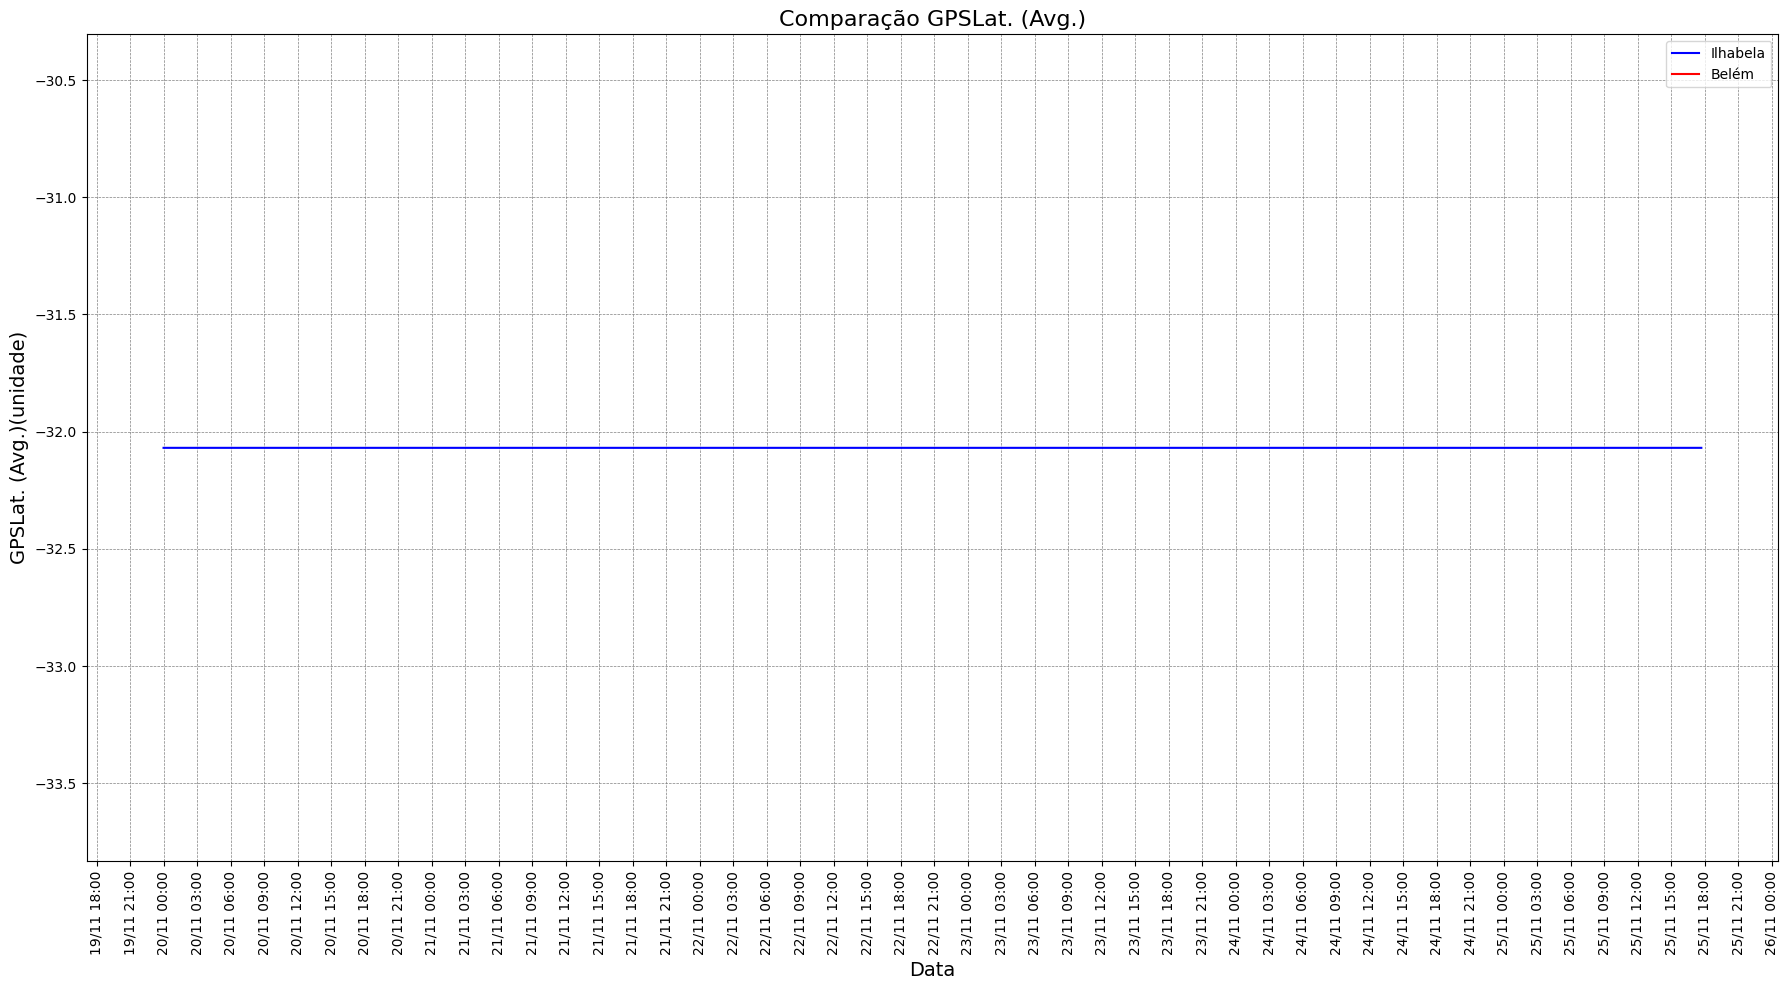

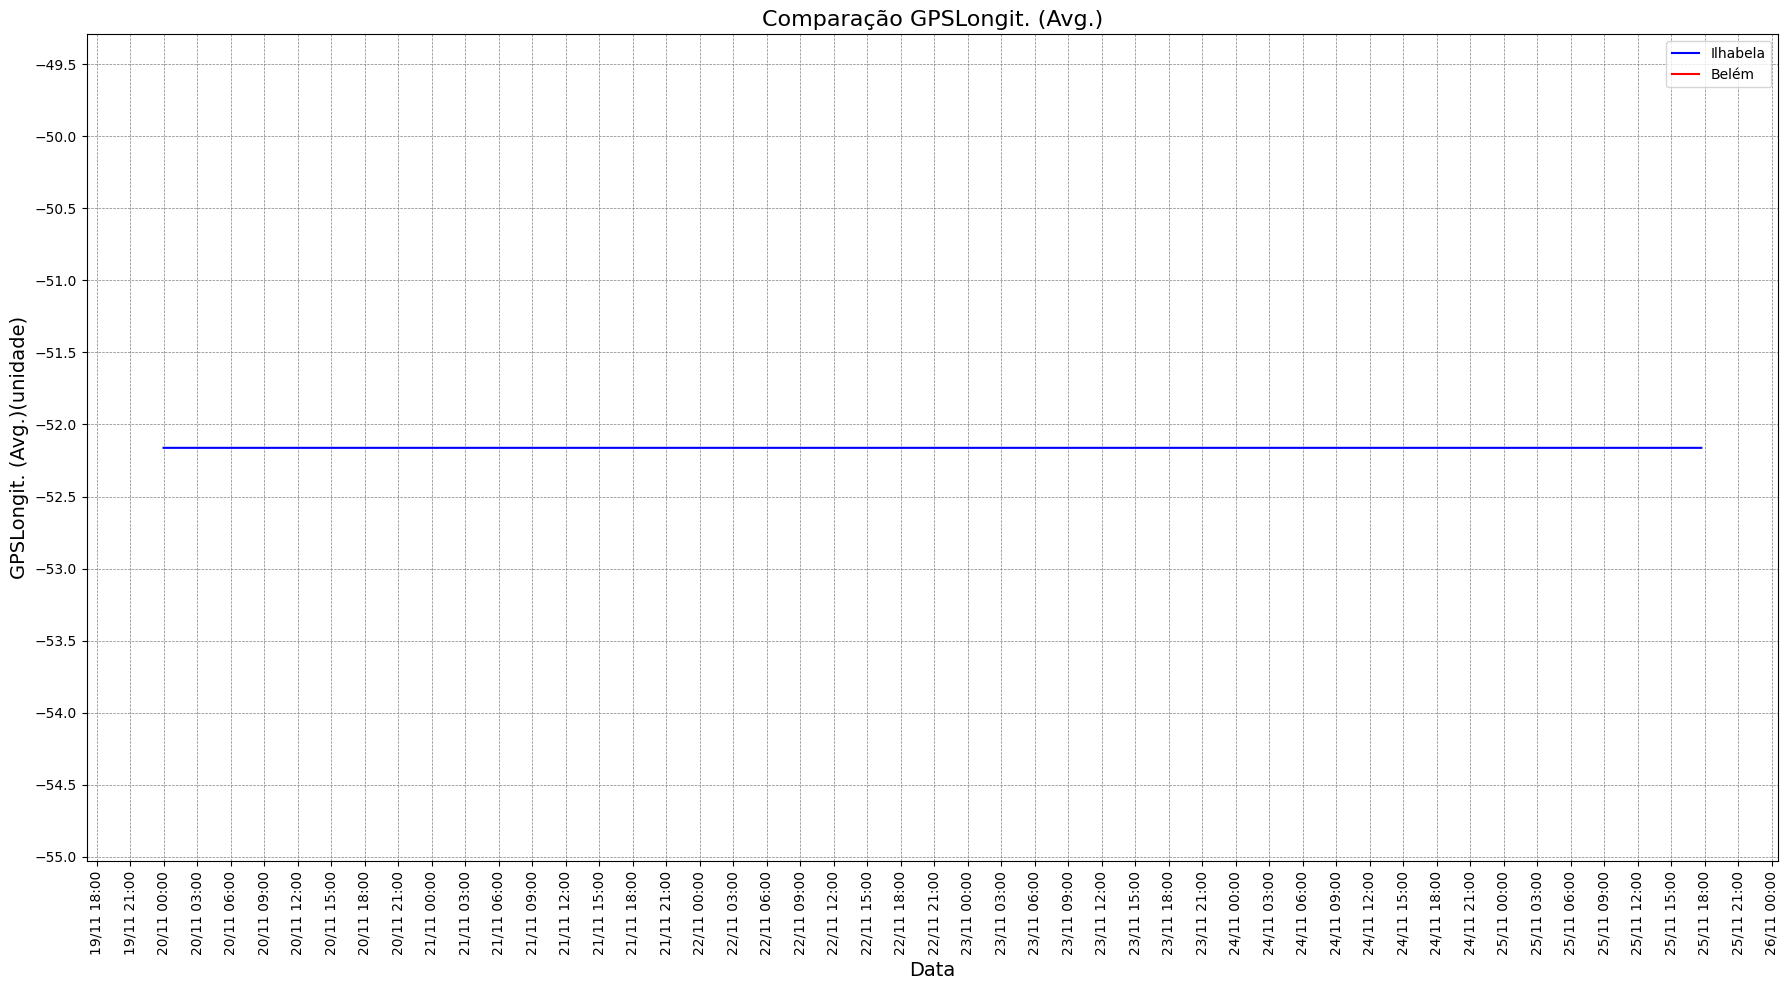

In [17]:
# Plotando os dados
plt.figure(figsize=(18,18))

for var in variaveis:
    # Remover as linhas com NaN em 'Wind Spd. (Ins)' antes de plotar
    maregrafo_1_clean = maregrafo_1.dropna(subset=[var])
    maregrafo_2_clean = maregrafo_2.dropna(subset=[var])
    
    #Criar o gráfico
    fig, ax = plt.subplots(figsize=(18, 10))

    # Plotando os dados limpos (sem NaNs)
    ax.plot(maregrafo_1_clean['Date'], maregrafo_1_clean[var].rolling(30, min_periods=1).mean(), color='b', label='Ilhabela')
    ax.plot(maregrafo_2_clean['Date'], maregrafo_2_clean[var].rolling(30, min_periods=1).mean(), color='r', label='Belém')

    #ax.plot(maregrafo_1_clean['Date'], maregrafo_1_clean[var], label='Ilhabela (bruto)')
    #ax.plot(maregrafo_2_clean['Date'], maregrafo_2_clean[var], label='Belém (bruto)')
    # Ajuste do eixo X
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))  # Correção completa
    ax.yaxis.set_major_locator(MultipleLocator(0.5))  # Ajuste o valor (0.2) conforme necessário para sua escala
    plt.xticks(rotation=90)

    # Adicionando grade
    ax.grid(which='major', linestyle='--', linewidth=0.5, color='gray')

    # Adicionando títulos e rótulos
    plt.legend()
    plt.title(f'Comparação {var}', fontsize=16)
    plt.xlabel('Data', fontsize=14)
    plt.ylabel(f'{var}(unidade)', fontsize=14)

    # Ajustar layout e exibir
    plt.tight_layout()
    plt.savefig(f'{var}.png',dpi=500) #
    plt.show()